In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [2]:
# Get the seed
import numpy as np
np.random.seed(2676)

In [3]:
# Get the data
all_data = pd.read_csv("input_data/model_ready_data.csv")
all_data

,index,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,LOCALITY,SUBLOCALITY,...,SUBLOCALITY_is_New York,SUBLOCALITY_is_New York County,SUBLOCALITY_is_Queens,SUBLOCALITY_is_Queens County,SUBLOCALITY_is_Rego Park,SUBLOCALITY_is_Richmond County,SUBLOCALITY_is_Riverdale,SUBLOCALITY_is_Snyder Avenue,SUBLOCALITY_is_Staten Island,SUBLOCALITY_is_The Bronx
0,0,100.000,Condo for sale,315000,2,2.000000,1400.000000,100.000,New York,Manhattan,...,False,False,False,False,False,False,False,False,False,False
1,1,100.001,Condo for sale,195000000,7,10.000000,17545.000000,100.001,New York,New York County,...,False,True,False,False,False,False,False,False,False,False
2,2,100.002,House for sale,260000,4,2.000000,2015.000000,100.002,New York,Richmond County,...,False,False,False,False,False,True,False,False,False,False
3,3,100.003,Condo for sale,69000,3,1.000000,445.000000,100.003,New York,New York County,...,False,True,False,False,False,False,False,False,False,False
4,4,100.004,Townhouse for sale,55000000,7,2.373861,14175.000000,100.004,New York,New York County,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,4796,100.003,Co-op for sale,599000,1,1.000000,2184.207862,100.206,New York County,New York,...,True,False,False,False,False,False,False,False,False,False
4793,4797,100.302,Co-op for sale,245000,1,1.000000,2184.207862,100.018,New York,Queens County,...,False,False,False,True,False,False,False,False,False,False
4794,4798,100.005,Co-op for sale,1275000,1,1.000000,2184.207862,100.158,New York,New York County,...,False,True,False,False,False,False,False,False,False,False
4795,4799,100.034,Condo for sale,598125,2,1.000000,655.000000,100.013,Queens County,Queens,...,False,False,True,False,False,False,False,False,False,False


### Test/Train Split

In [4]:
# Get the y and x data in different variables
y_label = all_data["PRICE"]
X_data = all_data.drop(columns=["PRICE", "index", "TYPE", "LOCALITY", "SUBLOCALITY"])

# Split the data into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_data, y_label, test_size=0.3, random_state=43)

In [5]:
train_X

,BROKERTITLE,BEDS,BATH,PROPERTYSQFT,STATE,STREET_NAME,TYPE_is_Co-op for sale,TYPE_is_Coming Soon,TYPE_is_Condo for sale,TYPE_is_Condop for sale,...,SUBLOCALITY_is_New York,SUBLOCALITY_is_New York County,SUBLOCALITY_is_Queens,SUBLOCALITY_is_Queens County,SUBLOCALITY_is_Rego Park,SUBLOCALITY_is_Richmond County,SUBLOCALITY_is_Riverdale,SUBLOCALITY_is_Snyder Avenue,SUBLOCALITY_is_Staten Island,SUBLOCALITY_is_The Bronx
4065,100.035,5,6.000000,2184.207862,100.120,100.003,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4340,100.045,2,1.000000,950.000000,100.112,100.073,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2315,100.005,1,1.000000,2184.207862,100.126,100.004,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1277,100.003,1,1.000000,2184.207862,100.041,100.004,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
942,100.112,8,2.373861,6000.000000,100.074,100.003,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,100.126,4,4.000000,2755.000000,100.022,100.002,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2064,100.066,1,1.000000,2184.207862,100.020,100.015,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2325,100.037,1,1.000000,2184.207862,100.099,100.133,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2303,100.109,2,1.000000,900.000000,100.255,100.008,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [6]:
print(f"X Train Data Length = {len(train_X)} \t\t X Test Data Length = {len(test_X)} \n Y Train Data Length = {len(train_y)} \t\t Y Test Data Length = {len(test_y)}")

X Train Data Length = 3357 		 X Test Data Length = 1440 
 Y Train Data Length = 3357 		 Y Test Data Length = 1440


### Random Forest Decision Tree Model

In [7]:
# Set model for regression
rf_df_model = RandomForestRegressor(n_estimators=100, random_state=30)

# Fit model
rf_df_model.fit(train_X, train_y)

RandomForestRegressor(random_state=30)

In [8]:
# Make predictions
y_pred = rf_df_model.predict(test_X)

### Model Prediction Statistics

In [9]:
# Mean Squared Error (MSE)
mse = mean_squared_error(test_y, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Coefficient of Determination (R-squared)
r_squared = r2_score(test_y, y_pred)
print(f'Coefficient of Determination (R-squared): {r_squared}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_y, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Define the number of folds (k)
# You can adjust this based on your preference
num_folds = 5  

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation for R-squared
cross_val_r_squared = cross_val_score(rf_df_model, train_X, train_y, cv=kf, scoring='r2')

# Display the results
print(f'K-fold Cross-validated R-squared: {np.mean(cross_val_r_squared)}')

Mean Squared Error (MSE): 5682252134842.803
Coefficient of Determination (R-squared): 0.644865381495924
Mean Absolute Error (MAE): 741107.285556217
Root Mean Squared Error (RMSE): 2383747.498130371
K-fold Cross-validated R-squared: 0.4895975798385089


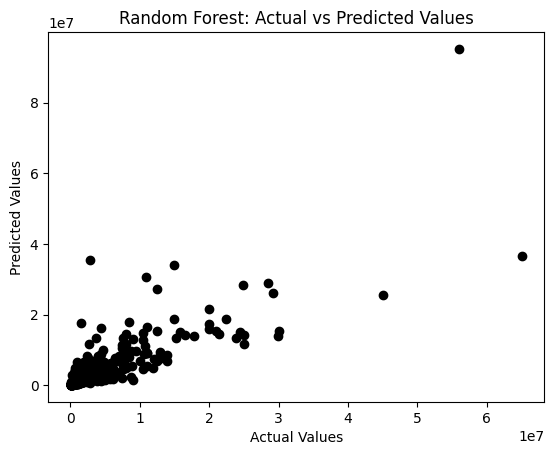

In [10]:
# Plot outputs
plt.scatter(test_y, y_pred, color="black")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted Values")
plt.savefig('output/random_forest.jpg')
plt.show()

In [11]:
# Get feature importances
feature_importances = rf_df_model.feature_importances_

# Create a DataFrame to display the feature importances
coeff = pd.DataFrame(list(zip(train_X.columns, feature_importances)), columns=['Feature', 'Importance'])
coeff.sort_values('Importance', ascending=False, inplace=True)

# Print the sorted DataFrame
print(coeff)

                               Feature    Importance
3                         PROPERTYSQFT  3.380589e-01
4                                STATE  1.790696e-01
2                                 BATH  9.426802e-02
0                          BROKERTITLE  8.608604e-02
5                          STREET_NAME  5.977561e-02
1                                 BEDS  5.440076e-02
8               TYPE_is_Condo for sale  5.427862e-02
24         LOCALITY_is_New York County  5.046534e-02
42      SUBLOCALITY_is_New York County  3.283496e-02
41             SUBLOCALITY_is_New York  1.153900e-02
18          TYPE_is_Townhouse for sale  9.454648e-03
16  TYPE_is_Multi-family home for sale  7.505880e-03
6               TYPE_is_Co-op for sale  6.905752e-03
13              TYPE_is_House for sale  4.608411e-03
23                LOCALITY_is_New York  3.233534e-03
40            SUBLOCALITY_is_Manhattan  2.099081e-03
17                     TYPE_is_Pending  1.786023e-03
39         SUBLOCALITY_is_Kings County  9.3470

(-0.0001, 0.01)

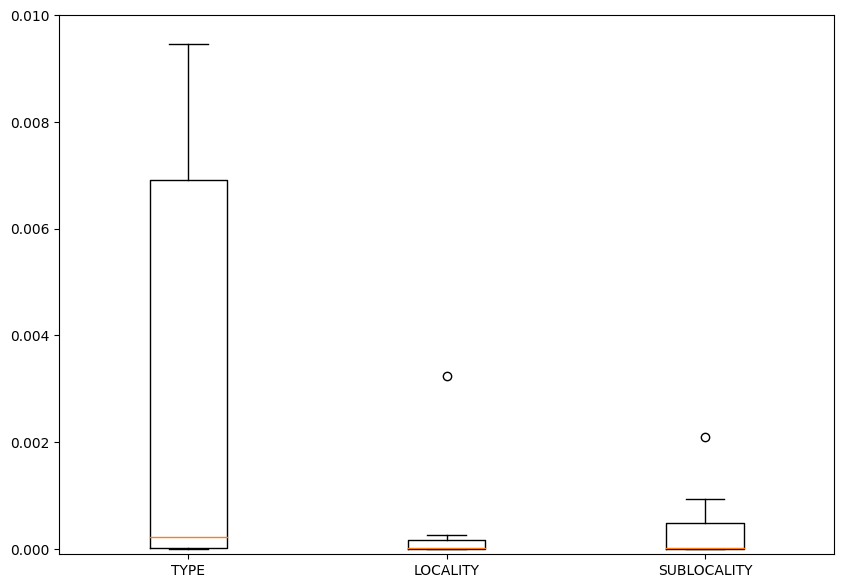

In [12]:
one_hot_attribute_list = ["TYPE", "LOCALITY", "SUBLOCALITY"]

features = coeff["Feature"]
weights = coeff["Importance"]

box_plot_dict = {
    "TYPE": [],
    "LOCALITY": [],
    "SUBLOCALITY": [],
}

for attribute in one_hot_attribute_list:
    for i in range(len(features)):
        feature = str(features[i])
        if feature.startswith(attribute):
            box_plot_dict[attribute].append(weights[i])

fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot([box_plot_dict["TYPE"], box_plot_dict["LOCALITY"], box_plot_dict["SUBLOCALITY"]])
plt.xticks(range(1, len(one_hot_attribute_list) + 1), one_hot_attribute_list)
plt.ylim([-0.0001, 0.01])